<a href="https://colab.research.google.com/github/alexandrakraeva/IAAC2024_tutorials/blob/main/notebooks/05_model_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/04_model_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

### Data

⚠️ **NOTE:** Kaggle files have already been uploaded to the repo. You find them in folder `kaggle_data`´

If you for any reason need to download data from kaggle, instructions are in one of the [optional notebooks](./88_kaggle_data.ipynb) : <a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/88_kaggle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!git clone https://github.com/STASYA00/IAAC2024_tutorials
%cd IAAC2024_tutorials/notebooks

Cloning into 'IAAC2024_tutorials'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 164 (delta 40), reused 70 (delta 37), pack-reused 89
Receiving objects: 100% (164/164), 19.61 MiB | 27.06 MiB/s, done.
Resolving deltas: 100% (71/71), done.
/content/IAAC2024_tutorials/notebooks/IAAC2024_tutorials/notebooks


In [57]:
# importing the necessary packages
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [58]:
train = pd.read_csv("../kaggle_data/train.csv", index_col=0)
test = pd.read_csv("../kaggle_data/test.csv", index_col=0)
metadata = pd.read_csv("../kaggle_data/tutorial_results/02_metadata.csv", index_col=0)
metadata.head()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
136,432,3,0,2,4703.0,1,0,0,0,0,0,2,11,1906.0,5.0,306.0,1.0
137,416,3,0,2,499.3,1,0,1,0,0,0,2,7,1995.0,4.0,306.0,0.0
138,436,3,0,2,9061.0,1,0,0,0,0,0,2,7,2005.0,10.0,451.0,2.0
139,441,3,0,3,7579.0,1,0,0,0,0,0,2,7,1913.0,5.0,379.0,0.0
140,442,3,0,3,5295.0,1,0,1,0,0,0,2,7,1953.0,6.0,306.0,1.0


In [4]:
train.head()

In [5]:
X.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

### Data Split

You can compare training a model to teaching a kid to distinguish between the numbers. Or to training a medical student to distinguish between different illnesses on patients. The student would need to see people with different symptoms and understand which condition they have. First the professor shows _how_ to understand which condition each patient has (on the actual patients). But what is the reasonable way to control whether the student learned how to do it _himself_? Most university programs solve it by giving a test with similar samples _that the student has not seen before_ and check his performance there.

We do a similar thing with our models. First, we train our model - our future doctor - on a set of examples. A few of the examples that we know the answers for we keep for the validation of his knowledge - whether or not the model has been able to learn. The test set in data science problems is the real-world practice, working in the hospital.

![Train-validation split](https://github.com/STASYA00/IAAC2024_tutorials/blob/main/.assets/train_validation_split.jpg?raw=1)

The rule of thumb is to split your _known data_, the data you _know the answer to_ into **train** (80%) and **validation** (20%). There are other strategies as well, we will discuss them later. Test set is the set you do not know the answer to (or the real-world practice).

#### ⚙️ Code

[Method reference](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [21]:
from sklearn.model_selection import train_test_split
# note, the parameter is called test_size, but in fact it refers to validation set. This might be confusing
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2,
                                                      random_state=42, shuffle=True)

#### 🪸 Visual

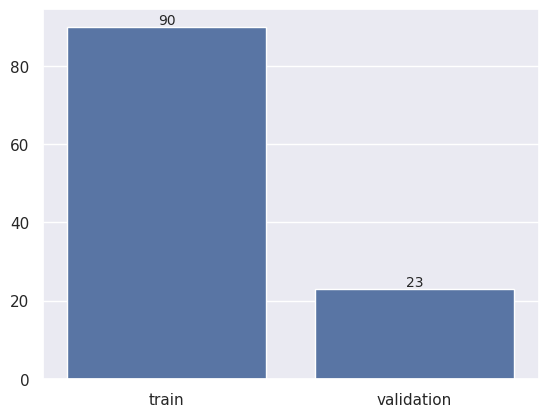

In [22]:
sns.set()
ax = sns.barplot(y=[X_train.shape[0], X_valid.shape[0]], x=["train", "validation"])
_ = ax.bar_label(ax.containers[0], fontsize=10)  # plotting the actual size on top of the bars

## 🏡 Buildings' Efficiency - First models

### Introduction

The easiest way to think about the models is pairing. We pair input to output.

There are many types of data (numbers, categories, images, 3D data, video, music, text ...). ML models allow us to "link" different data types. We can define what we have as "in" data and what we want to transform it into (or pair it with).

Different models make different kinds of "pairing".

<img src="https://github.com/STASYA00/IAAC2024_tutorials/blob/main/.assets/io.png?raw=1" height="800px"/>

We will start with the models that pair numerical and categorical data.

### 🫧 Linear Regression

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

#### 🪸 Visual

[![Linear Regression and Least Squares](https://img.youtube.com/vi/S0ptaAXNxBU?si=BzE5kEflCQWdenp6&t=35/0.jpg)](https://youtu.be/S0ptaAXNxBU?si=BzE5kEflCQWdenp6&t=35)

#### Our data

<Axes: xlabel='sqm', ylabel='occupants'>

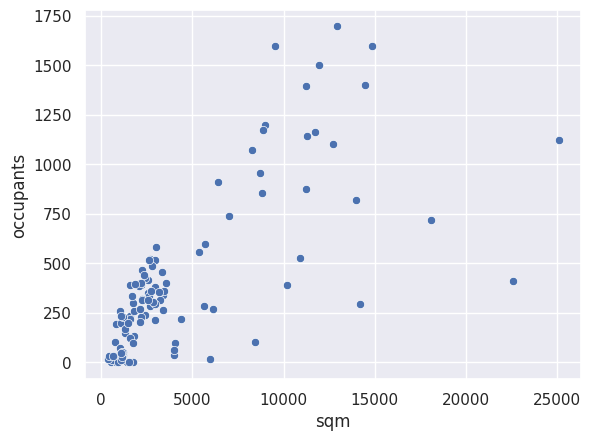

In [23]:
sns.scatterplot(x = X["sqm"], y = Y)

We can see that there is some dependency between these two variables. How should we draw the line?

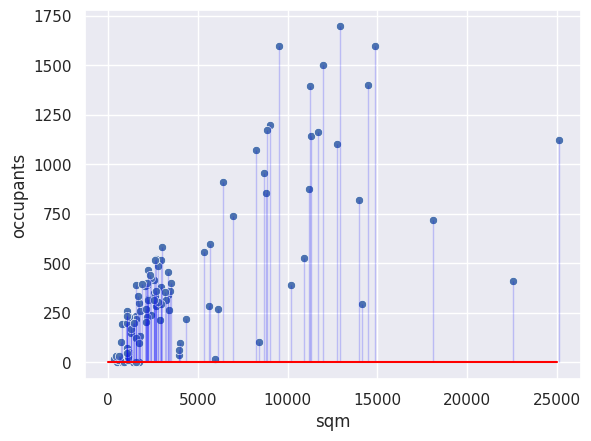

In [24]:
ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=[0,25000], y=[0, 0], color=(1, 0,0 ), ax=ax)
for x, y in zip(X["sqm"], Y):
  # y_coord = 0 * x
  # used to define the starting point of the vertical lines on the y-axis, which is always at y=0
  # in this context. The purpose of these vertical lines is likely to visually connect each data point
  # to the baseline, emphasizing the distance of each point from y=0
    y_coord = 0 * x
    sns.lineplot(x=[x, x], y=[y_coord, y], color = (0,0,1))

In [25]:
ax = sns.scatterplot(x = X["sqm"], y = Y)
sns.lineplot(x=[0,25000], y=[0, 1000], color=(1, 0,0 ), ax=ax)
for x, y in zip(X["sqm"], Y):
    #  The slope of this line (rise over run) can be calculated as
    # (1000 - 0) / (25000 - 0) = 1 / 25, indicating a consistent increase in y for each unit increase in x.
  y_coord = 1 / 25 * x
    sns.lineplot(x=[x, x], y=[y_coord, y], color = (0,0,1))

IndentationError: unexpected indent (<ipython-input-25-a4c31d4eba94>, line 7)

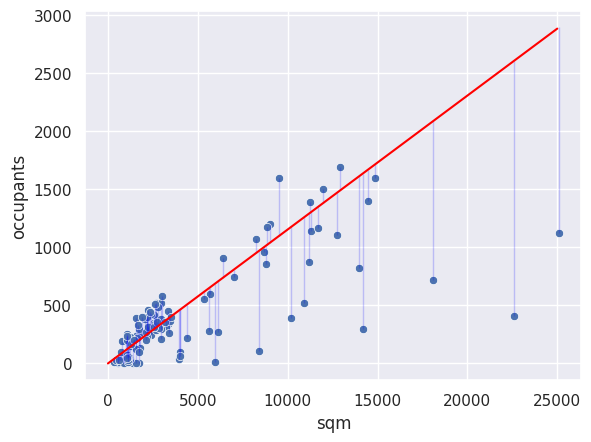

In [26]:
ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=[0,25000], y=[0, 25000 * 3 / 26], color=(1, 0,0 ), ax=ax)
for x, y in zip(X["sqm"], Y):
    y_coord = 3 / 26 * x
    sns.lineplot(x=[x, x], y=[y_coord, y], color = (0,0,1))

#### ⚙️ Code

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
features = ["sqm"]
reg = LinearRegression().fit(X_train[features], Y_train)
score = reg.score(X_valid[features], Y_valid)
res = reg.predict(X_test[features])
print(res.min(), res.max())
print("SCORE: {}".format(score))


175.34419464419918 1500.8627816376968
SCORE: 0.5525741449457944


In [30]:
print(reg.predict([[0]]))
print(reg.predict([[1], [0]]))

[156.28218501]
[156.33469744 156.28218501]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 🎢 Result

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Score: 0.5525741449457944


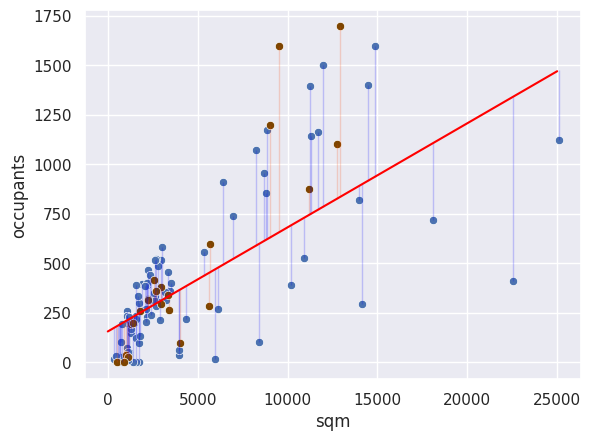

In [31]:

x = [0, 25000]
train_predict = reg.predict(X_train[features])
valid_predict = reg.predict(X_valid[features])

ax = sns.scatterplot(x = X_train["sqm"], y = Y_train)
sns.scatterplot(x = X_valid["sqm"], y = Y_valid, color=(0.49, 0.27, 0.003))

# our regression line
sns.lineplot(x=x, y=reg.predict(np.array(x).reshape(-1,1)), color=(1, 0, 0 ), ax=ax)

# regression results for train set
for i, (x, y) in enumerate(zip(X_train["sqm"], Y_train)):
    y_coord = reg
    sns.lineplot(x=[x, x], y=[train_predict[i], y], color = (0,0,1))

# regression results for validation set
for i, (x, y) in enumerate(zip(X_valid["sqm"], Y_valid)):
    y_coord = reg
    sns.lineplot(x=[x, x], y=[valid_predict[i], y], color = (0.99, 0.26, 0.01))

print("Score: {}".format(reg.score(X_valid[features], Y_valid)))

#### 🧩 Task I - Combining features

Combining several features might give better results. Try using several different features in this regression model and see how the score changes

In [ ]:
features = []  # columns you want to use for the linear regression

reg = # Your code here

score = reg.score(X_valid[features], Y_valid)
print("SCORE: {}".format(score))

#### ⚙️ Solution

We can look at several different examples:

In [35]:
features = ["sqm", "numberoffloors"]  # columns you want to use for the linear regression

reg = LinearRegression().fit(X_train[features], Y_train)

score = reg.score(X_valid[features], Y_valid)
print("Score: {}".format(score))

Score: 0.5956734668059934


0.596 is a significant improvement from 0.55! What happens if we add one more?

In [36]:
features = ["sqm", "numberoffloors", "primaryspaceusage"]  # columns you want to use for the linear regression

reg = LinearRegression().fit(X_train[features], Y_train)

score = reg.score(X_valid[features], Y_valid)
print("Score: {}".format(score))

Score: 0.6193474019142722


Even better! What happens if we add all the features?

In [37]:
reg = LinearRegression().fit(X_train, Y_train)

score = reg.score(X_valid, Y_valid)
print("Score: {}".format(score))

Score: 0.6497823654857073


0.64, an even bigger increase. Look at what results different column combinations give. Note, sometimes adding more columns can bring worse results.

### 🫧 Decision Tree

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

We still have quite a big error in our predictions. And here we were looking at a feature that did have some correlation with the target variable. Let's look at other features:

<Axes: xlabel='numberoffloors', ylabel='occupants'>

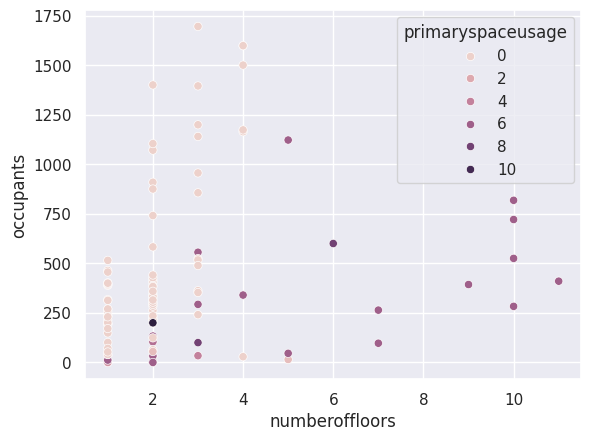

In [38]:
sns.scatterplot(x = X["numberoffloors"], y = Y,hue=X["primaryspaceusage"])

Applying regression here would result in negative values. Can the amount of occupants be negative?

A decision tree helps to capture more complex relationships in data. The idea is, however, simple: a set of binary questions to be answered:

![decision tree illustration](https://cdn-images-1.medium.com/max/778/1*OLJWt9hD2zTS-x3gRhYuqg.png)

#### ⚙️ Code

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# DecisionTreeClassifier for classification

model = DecisionTreeRegressor().fit(X, Y)
print("Score: {}".format(model.score(X, Y)))

Score: 1.0


#### 🪸 Visual

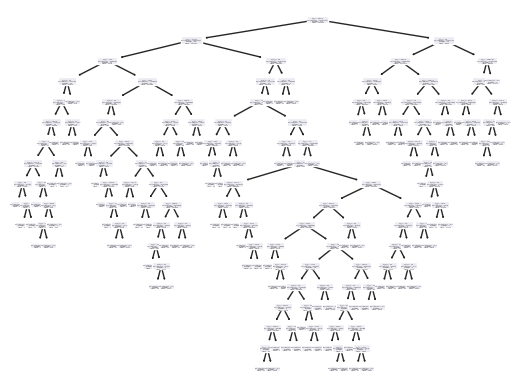

In [40]:
_ = tree.plot_tree(model)

Let's see how the tree changes based on different parameters that we use:

**Amount of tree levels**

Score: 0.849206095191048


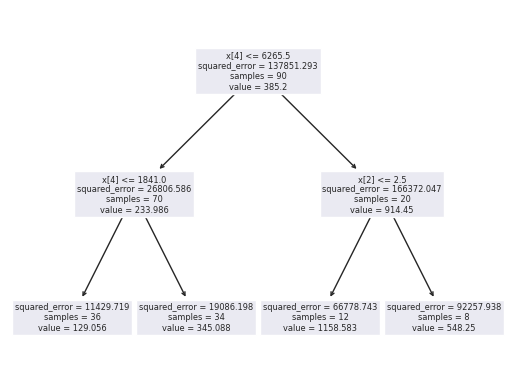

In [41]:
model = DecisionTreeRegressor(max_depth=2).fit(X_train, Y_train)

print("Score: {}".format(model.score(X_valid, Y_valid)))
_ = tree.plot_tree(model)

Score: 0.8607748261626919


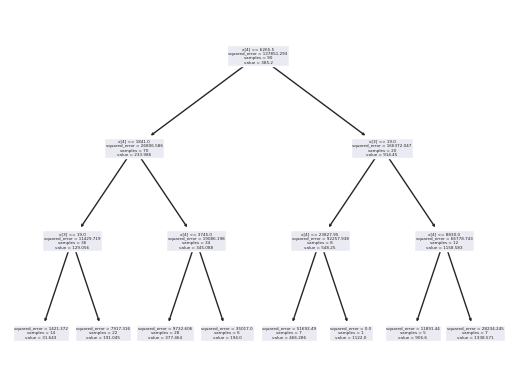

In [42]:
model = DecisionTreeRegressor(max_depth=3).fit(X_train, Y_train)
print("Score: {}".format(model.score(X_valid, Y_valid)))
_ = tree.plot_tree(model)

**Minimum amount of samples left at the end of each branch (leaf)**

Score: 0.8457938610059509


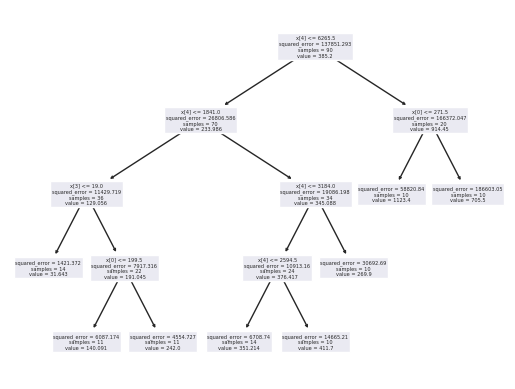

In [43]:
model = DecisionTreeRegressor(min_samples_leaf=10).fit(X_train, Y_train)

print("Score: {}".format(model.score(X_valid, Y_valid)))
_ = tree.plot_tree(model)

If we look at the score of the first decision tree with all the training data included, we will see that it equals to 1.0. Does it mean we have found the perfect solution?

This phenomenon is known as [overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html). We will come to it later.

### 🫧 Random Forest

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Using decision tree causes complications in the choice of parameters. It is not easy to determine which are best suitable for each problem. We can draw an analogy of a tree being a doctor facing a complex problem. We don't really know how this doctor's knowledge _fits_ to the patient's condition.

One of the solutions was to use a _consortium_ of doctors, each of them having limited knowledge on a small aspect of the more complex issue.

Random forest is a forest of shallow trees that make a decision together.

#### 🪸 Visual

![Random forest analogy](https://github.com/STASYA00/IAAC2024_tutorials/blob/main/.assets/random_forest.jpg?raw=1)

_Image credits: [Pierluca Lanzi](https://www.slideshare.net/pierluca.lanzi/dmtm-lecture-10-classification-ensembles)_

#### ⚙️ Code

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10).fit(X_train, Y_train)

In [46]:
print("Score: {}".format(model.score(X_valid, Y_valid)))

Score: 0.8666150434304459


Here we can see which features are considered to be the most important according to our consortium:

In [47]:
model.feature_importances_

array([5.64325277e-02, 1.82348280e-05, 7.01926414e-02, 2.99305067e-02,
       7.80131262e-01, 0.00000000e+00, 3.74200815e-06, 0.00000000e+00,
       0.00000000e+00, 1.71365367e-02, 2.87208205e-03, 1.86274978e-02,
       6.52252849e-06, 5.21071910e-03, 9.03873343e-03, 1.03989936e-02])

In [48]:
index = np.argmax(model.feature_importances_) # index of the highest value
print("Index of the highest value is          {}".format(index))
highest_value = model.feature_importances_[index]
print("Highest value is      {}".format(highest_value))
feature_name = X_train.columns[index]
print("The most important feature is        {}".format(feature_name))

Index of the highest value is          4
Highest value is      0.7801312622281478
The most important feature is        sqm


In [49]:
metadata[target].loc[metadata[target].isna()==True]=model.predict(X_test)
# assigning new values to the metadata file

<ipython-input-49-799a09513d2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata[target].loc[metadata[target].isna()==True]=model.predict(X_test)


#### 🧩 Task II - Finding second most important feature

We have found the name of the most important feature in predicting the number of occupants of the building. The task is the find **the second** most important feature.

In [50]:
second_highest_value = # Your code here
index =  # your code here

print("Index of the second highest value is          {}".format(index))
print("Highest value is      {}".format(second_highest_value))
feature_name = X_train.columns[index]
print("The most important feature is        {}".format(feature_name))

SyntaxError: invalid syntax (<ipython-input-50-2d302b247c46>, line 1)

#### ⚙️ Solution

Note that it can be written in many different ways 😉 I have chosen to write it this way:

In [51]:
second_highest_value = sorted(model.feature_importances_, reverse=True)[1]
index = list(model.feature_importances_).index(second_highest_value)

print("Index of the second highest value is          {}".format(index))
print("Highest value is      {}".format(second_highest_value))
feature_name = X_train.columns[index]
print("The most important feature is        {}".format(feature_name))

Index of the second highest value is          2
Highest value is      0.07019264141671695
The most important feature is        primaryspaceusage


### 🫧 Boosting

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)

#### 🪸 Visual

Boosting exploits the same idea of using a consortium of doctors. The difference is that they all act collaboratively:

![Boosting1](https://github.com/STASYA00/IAAC2024_tutorials/blob/main/.assets/boosting1.jpg?raw=1)
![Boosting2](https://github.com/STASYA00/IAAC2024_tutorials/blob/main/.assets/boosting2.jpg?raw=1)

_Image credits: [Pierluca Lanzi](https://www.slideshare.net/pierluca.lanzi/dmtm-lecture-10-classification-ensembles)_

#### ⚙️ Code

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(X_train,Y_train)
print("Score: {}".format(model.score(X_valid,Y_valid)))

Score: 0.830255116676412


### 🫧 Clustering

Oftentimes we do not have the Y-labels for our data. Or we want to capture more complex relationships in our data by grouping them together. That's when clustering comes into play.

#### 🫧 KMEANS

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

##### 🪸 Visual

[![Clustering](https://www.imperva.com/blog/wp-content/uploads/sites/9/2017/07/k-means-clustering-on-spherical-data-1v2.png)](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

![](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

##### ⚙️ Code

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1
 0 1]


#### 🫧 DBSCAN

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

##### 🪸 Visual

[![DBSCAN Clustering](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F071b3ee2-5df1-4900-8539-a55d2ee18d8e_3221x2180.png)](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

_Image credits: [DailydoseofDS](https://www.blog.dailydoseofds.com/p/the-limitations-of-dbscan-clustering)_

##### ⚙️ Code

In [54]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=100, min_samples=2).fit(X)
clustering.labels_

array([ 0,  1,  2,  2, -1,  3,  0,  0,  4, -1, -1,  5, -1, -1,  4, -1, -1,
        6, -1,  0,  1, -1,  5, -1,  6,  7,  3,  8,  2,  3,  1,  1,  9,  1,
        1, -1, 10, 11,  6, 10, 12, 10,  1,  1, 10, -1, 10,  1,  1, -1, 10,
       12, 10,  1, -1, 10, -1, 12, -1, 12,  3,  7, 13, -1, -1,  1, 14,  6,
       -1,  1, -1, -1, -1,  8,  6, 14, 13, -1, -1,  1, 13, 10, 12,  8, -1,
       -1,  1, 10,  8, 11, -1, -1, 12, -1, -1,  9, 10,  9, -1, -1,  1,  1,
        1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1])

#### 🧩 Task III - Showing new features to the models

Why were we making all these features? To use them in our models and see whether the result improves. The task is to try different clusterings, add the new features to our dataset, try different models with the newly received features and see how the result changes. **Remember that the features should be added to both the train and the validation sets**. One way to do it is to engineer the features on the entire set and split it anew.

In [ ]:
# Your code here

#### ⚙️ Solution

We will not go through all the options in the solution, only the coding part 🙃

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)
new_feature = kmeans.labels_
X["kmeans_5_labels"] = kmeans.labels_
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2,
                                                      random_state=42, shuffle=True)

Our new train and validation sets can be used with the models as shown in the beginning of the notebook 😛

### 🧬 Resources

* [mlcourse.ai](https://mlcourse.ai/book/index.html)